# Ward Results
A notebook for generating ward level data.

**Prerequisites**
* Download a subdivision shapefile for the place you want to analyse. For example, [GADM](https://gadm.org/data.html) provides level-4 administrative subdivisions for various countries.
    * In South Africa, level-4 subdivisions are wards ([ref](https://en.wikipedia.org/wiki/Administrative_divisions_of_South_Africa)).
* For South Africa specifically, the GADM boundaries are from 2011. To download more recent shapefiles, use the [Municipal Demarcation Board](https://dataportal-mdb-sa.opendata.arcgis.com/search?type=File%2520Geodatabase%2CShapefile) knowledge hub.

Download the shapefile into data > continent > country > shapefile.

In [1]:
import geopandas as gpd
import glob, os

from mapping.map_e2e import process_polygon


In [2]:
# NB! Only run this once
%cd ..
%load_ext autoreload
%autoreload 2

C:\Users\emily\Documents\repos\south-africa-street-history-mapping


In [17]:
# Constants
CONTINENT = 'africa'
COUNTRY = 'south-africa'
SHAPEFILE_DIR = f"data/{CONTINENT}/{COUNTRY}/shapefile"

# See keys in shapefile to determine what level you want to filter at. Here we are doing municipality
FILTER_LEVEL = 'CAT_B'
FILTER_VALUE = 'JHB'

# The key on which to dissolve the boundaries to get an outline polygon
DISSOLVE_BOUNDARY = 'Province'

In [8]:
shapefiles = glob.glob(f"{SHAPEFILE_DIR}/*.shp")
if len(shapefiles) <= 0:
    raise Exception(f"No shapefiles in path {SHAPEFILE_DIR}")

if len(shapefiles) > 1:
    raise Exception(f"Too many shapefiles in path {SHAPEFILE_DIR}")

shapefile_path = shapefiles[0]
shapefile_path

'data/africa/south-africa/shapefile\\SA_Wards2020.shp'

In [11]:
country_subdivisions = gpd.read_file(shapefile_path)
country_subdivisions[country_subdivisions['Province'] == 'Gauteng']

,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,geometry
2895,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,"POLYGON ((27.85070 -26.47969, 27.85068 -26.481..."
2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,2,City of Johannesburg,JHB,2020-11-26,79800002,JHB_2,"POLYGON ((27.88070 -26.49284, 27.88087 -26.493..."
2897,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,3,City of Johannesburg,JHB,2020-11-26,79800003,JHB_3,"POLYGON ((27.87042 -26.46787, 27.87059 -26.470..."
2898,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,4,City of Johannesburg,JHB,2020-11-26,79800004,JHB_4,"POLYGON ((27.86958 -26.44910, 27.86958 -26.449..."
2899,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,5,City of Johannesburg,JHB,2020-11-26,79800005,JHB_5,"POLYGON ((27.81010 -26.42435, 27.81439 -26.425..."
...,...,...,...,...,...,...,...,...,...,...
3419,Gauteng,Rand West City Local Municipality,GT485,31,West Rand,DC48,2020-11-26,74805031,GT485_31,"POLYGON ((27.70118 -26.27900, 27.69996 -26.279..."
3420,Gauteng,Rand West City Local Municipality,GT485,32,West Rand,DC48,2020-11-26,74805032,GT485_32,"POLYGON ((27.74465 -26.27949, 27.73847 -26.282..."
3421,Gauteng,Rand West City Local Municipality,GT485,33,West Rand,DC48,2020-11-26,74805033,GT485_33,"POLYGON ((27.72198 -26.23594, 27.72473 -26.238..."
3422,Gauteng,Rand West City Local Municipality,GT485,34,West Rand,DC48,2020-11-26,74805034,GT485_34,"POLYGON ((27.69489 -26.28297, 27.69489 -26.283..."


<Axes: >

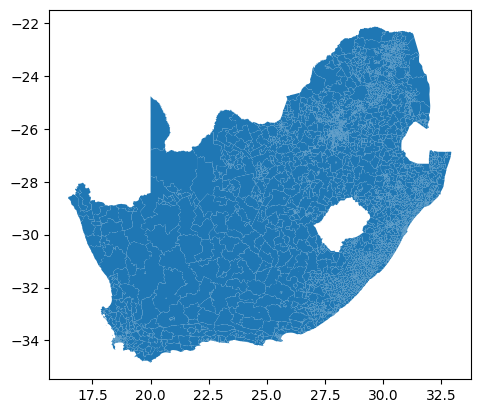

In [10]:
country_subdivisions.plot()

## Filter
Only retrieve region that we're interested in.

In [15]:
roi_shapefile = country_subdivisions[country_subdivisions[FILTER_LEVEL] == FILTER_VALUE]
roi_shapefile

,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,geometry
2895,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,"POLYGON ((27.85070 -26.47969, 27.85068 -26.481..."
2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,2,City of Johannesburg,JHB,2020-11-26,79800002,JHB_2,"POLYGON ((27.88070 -26.49284, 27.88087 -26.493..."
2897,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,3,City of Johannesburg,JHB,2020-11-26,79800003,JHB_3,"POLYGON ((27.87042 -26.46787, 27.87059 -26.470..."
2898,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,4,City of Johannesburg,JHB,2020-11-26,79800004,JHB_4,"POLYGON ((27.86958 -26.44910, 27.86958 -26.449..."
2899,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,5,City of Johannesburg,JHB,2020-11-26,79800005,JHB_5,"POLYGON ((27.81010 -26.42435, 27.81439 -26.425..."
...,...,...,...,...,...,...,...,...,...,...
3025,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,131,City of Johannesburg,JHB,2020-11-26,79800131,JHB_131,"POLYGON ((27.87290 -26.48950, 27.87296 -26.489..."
3026,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,132,City of Johannesburg,JHB,2020-11-26,79800132,JHB_132,"POLYGON ((28.08813 -25.98413, 28.09191 -25.988..."
3027,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,133,City of Johannesburg,JHB,2020-11-26,79800133,JHB_133,"POLYGON ((28.19591 -25.98487, 28.19595 -25.985..."
3028,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,134,City of Johannesburg,JHB,2020-11-26,79800134,JHB_134,"POLYGON ((27.96747 -26.01655, 27.96736 -26.016..."


<Axes: >

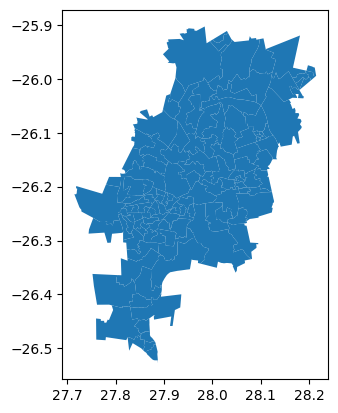

In [16]:
roi_shapefile.plot()

## Extract polygon
Get outer polygon of region.

<Axes: >

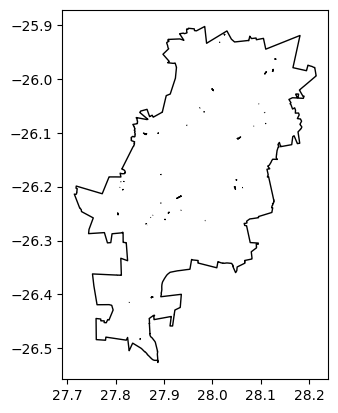

In [20]:
boundary = roi_shapefile[[DISSOLVE_BOUNDARY, 'geometry']]
boundary = boundary.dissolve(by=DISSOLVE_BOUNDARY)
boundary.plot(facecolor="none")

<Axes: >

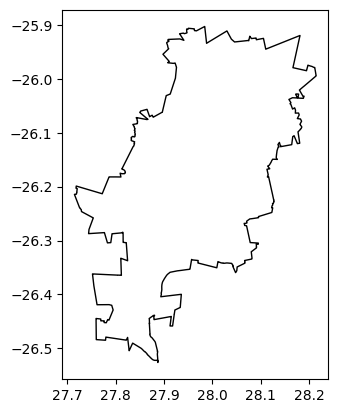

In [22]:
# Process with buffer so that artifacts are removed
# Change projection so that buffer applied as expected
# From geodetic coordinates (EPSG4326) to meters (3857) and back again
processed_boundary = (
    boundary.to_crs(crs=3857)
    .buffer(0.01)
    .buffer(-0.01)
    .to_crs(crs=boundary.crs)
)
processed_boundary.plot(facecolor="none")


## Graphing

In [ ]:
process_polygon(processed_boundary, 'johannesburg')